In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.nn.functional as F
import torch.optim.lr_scheduler as lr_scheduler
from torchvision import transforms, utils, models
from torch.utils.data import Dataset, DataLoader

In [4]:
from synthetic_utils import *

In [5]:
from trainer import *
from networks import *
from losses import *

In [6]:
if torch.cuda.is_available():
    device="cuda"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
else:
    device="cpu"
    torch.set_default_tensor_type('torch.FloatTensor')
print(device)

cuda


In [7]:
DATA_PATH = 'generated_data.pkl'
TRAIN_PATH = 'gen_train.pkl'
VAL_PATH = 'gen_val.pkl'
TEST_PATH = 'gen_test.pkl'

In [8]:
with open(TRAIN_PATH, 'rb') as f:
    imgs_train, shapes_train, colors_train = pickle.load(f)

In [9]:
with open(VAL_PATH, 'rb') as f:
    imgs_val, shapes_val, colors_val = pickle.load(f)

In [10]:
with open(TEST_PATH, 'rb') as f:
    imgs_test, shapes_test, colors_test = pickle.load(f)

In [11]:
imgs_train.shape, imgs_val.shape, imgs_test.shape, shapes_train.shape, shapes_val.shape, shapes_test.shape, colors_train.shape, colors_val.shape, colors_test.shape

((40000, 96, 96, 3),
 (5000, 96, 96, 3),
 (5000, 96, 96, 3),
 (40000, 1),
 (5000, 1),
 (5000, 1),
 (40000, 1),
 (5000, 1),
 (5000, 1))

In [12]:
imgs_train = imgs_train[:5000]
colors_train = colors_train[:5000]
shapes_train = shapes_train[:5000]

imgs_val = imgs_val[:500]
colors_val = colors_val[:500]
shapes_val = shapes_val[:500]

In [13]:
shapes_train = shapes_train.squeeze()
shapes_val = shapes_val.squeeze()
shapes_test = shapes_test.squeeze()
colors_train = colors_train.squeeze()
colors_val = colors_val.squeeze()
colors_test = colors_test.squeeze()

## Train only encoder first

In [14]:
encoder = LeNet()
classifier = ClassNet()

In [15]:
criterion = nn.BCELoss()
opt_cls = optim.Adam(classifier.parameters(), lr=0.001, betas=(0.9, 0.999))
opt_enc = optim.Adam(encoder.parameters(), lr=0.001, betas=(0.9, 0.999))

In [16]:
num_epochs = 100
train_losses = []
train_accs = []
val_losses = []
val_accs = []
epoch_time = AverageMeter()
ep_end = time.time()
for epoch in range(0, num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs))
#         scheduler_cls.step()
#         scheduler_enc.step()
        # train
        train_loss, train_acc = train_encoder_classifier_epoch(encoder,
                                classifier, imgs_train, shapes_train, opt_enc,
                                opt_cls, criterion, device)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        # validate
        print('-'*10)
        val_loss, val_acc = validate_encoder_classifier_epoch(encoder, classifier,
                                imgs_val, shapes_val, criterion, device)

        print('Avg validation loss: {} \t Accuracy: {}'.format(val_loss, val_acc))
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        print('-' * 20)
        epoch_time.update(time.time() - ep_end)
        ep_end = time.time()
        print('Epoch {}/{}\t'
              'Time {epoch_time.val:.3f} sec ({epoch_time.avg:.3f} sec)'.format(epoch, num_epochs, epoch_time=epoch_time))
        print('-'*20)

Epoch: 0/100
Batch: [0/78]	Time 0.027 (0.027)	Loss 0.6985 (0.6985)	Accuracy 0.4375 (0.4375)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Batch: [20/78]	Time 0.016 (0.018)	Loss 0.7280 (0.6964)	Accuracy 0.4219 (0.5089)
Batch: [40/78]	Time 0.016 (0.017)	Loss 0.6936 (0.6953)	Accuracy 0.5000 (0.5118)
Batch: [60/78]	Time 0.016 (0.017)	Loss 0.6932 (0.6948)	Accuracy 0.4844 (0.5069)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.6915 (0.6915)	Accuracy 0.5000 (0.5000)
Avg validation loss: 0.6916889805793762 	 Accuracy: 0.502
--------------------
Epoch 0/100	Time 1.347 sec (1.347 sec)
--------------------
Epoch: 1/100
Batch: [0/78]	Time 0.007 (0.007)	Loss 0.6925 (0.6925)	Accuracy 0.4375 (0.4375)
Batch: [20/78]	Time 0.016 (0.015)	Loss 0.7106 (0.6852)	Accuracy 0.4219 (0.5774)
Batch: [40/78]	Time 0.028 (0.016)	Loss 0.6568 (0.6817)	Accuracy 0.7031 (0.5998)
Batch: [60/78]	Time 0.016 (0.016)	Loss 0.1762 (0.5940)	Accuracy 0.9531 (0.6793)
----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.1179 (0.1179)	Accuracy 0.9531 (0.9531)
Avg validation loss: 0.13256543374061586 	 Accuracy: 0.946
--------------------
Epoch 1/100	Time 1.297 sec (1.322 sec)
--------------------
Epoch: 2/100
Batch: [0/78]	Time 0.007 (0.007)	Loss 0.0849 (0.0849)	Accuracy 0.9688 (0.9688)
Batch: [20/78]	Time 0.016 (0.015)	Loss 0.2449 (0.6692)	Accuracy 0.9844 (0.7567)
Batch: [40/78]	Time 0.016 (0.016)	Loss 0.

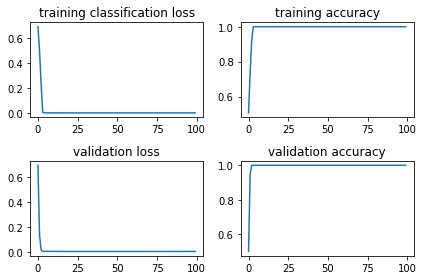

In [17]:
plt.subplot(221)
plt.title('training classification loss')
plt.plot(train_losses)
plt.subplot(222)
plt.title('training accuracy')
plt.plot(train_accs)
plt.subplot(223)
plt.title('validation loss')
plt.plot(val_losses)
plt.subplot(224)
plt.title('validation accuracy')
plt.plot(val_accs)
plt.tight_layout()

In [18]:
with open('plot_data/eo/onlycls.pkl', 'wb+') as f:
    pickle.dump([train_losses, train_accs, val_losses, val_accs], f)

## Train only adversary

In [19]:
adv_encoder = LeNet()
adversary = ClassNet()

In [20]:
adv_criterion = nn.BCELoss()
opt_adv = optim.Adam(adversary.parameters(), lr=0.001, betas=(0.9, 0.999))
opt_adv_enc = optim.Adam(adv_encoder.parameters(), lr=0.001, betas=(0.9, 0.999))

In [21]:
num_epochs = 100
atrain_losses = []
atrain_accs = []
aval_losses = []
aval_accs = []
epoch_time = AverageMeter()
ep_end = time.time()
for epoch in range(0, num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs))
#         scheduler_cls.step()
#         scheduler_enc.step()
        # train
        train_loss, train_acc = train_encoder_classifier_epoch(adv_encoder,
                                adversary, imgs_train, colors_train, opt_adv_enc,
                                opt_adv, adv_criterion, device)
        atrain_losses.append(train_loss)
        atrain_accs.append(train_acc)
        # validate
        print('-'*10)
        val_loss, val_acc = validate_encoder_classifier_epoch(adv_encoder, adversary,
                                imgs_val, colors_val, adv_criterion, device)

        print('Avg validation loss: {} \t Accuracy: {}'.format(val_loss, val_acc))
        aval_losses.append(val_loss)
        aval_accs.append(val_acc)
        
        print('-' * 20)
        epoch_time.update(time.time() - ep_end)
        ep_end = time.time()
        print('Epoch {}/{}\t'
              'Time {epoch_time.val:.3f} sec ({epoch_time.avg:.3f} sec)'.format(epoch, num_epochs, epoch_time=epoch_time))
        print('-'*20)

Epoch: 0/100
Batch: [0/78]	Time 0.012 (0.012)	Loss 0.6943 (0.6943)	Accuracy 0.4844 (0.4844)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Batch: [20/78]	Time 0.017 (0.017)	Loss 0.2885 (0.5935)	Accuracy 0.8906 (0.6540)
Batch: [40/78]	Time 0.016 (0.017)	Loss 0.0067 (0.3382)	Accuracy 1.0000 (0.8114)
Batch: [60/78]	Time 0.016 (0.017)	Loss 0.0377 (0.2295)	Accuracy 0.9844 (0.8727)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.0147 (0.0147)	Accuracy 0.9844 (0.9844)
Avg validation loss: 0.007430992872112256 	 Accuracy: 0.994
--------------------
Epoch 0/100	Time 1.346 sec (1.346 sec)
--------------------
Epoch: 1/100
Batch: [0/78]	Time 0.007 (0.007)	Loss 0.0015 (0.0015)	Accuracy 1.0000 (1.0000)
Batch: [20/78]	Time 0.016 (0.016)	Loss 0.0000 (0.0003)	Accuracy 1.0000 (1.0000)
Batch: [40/78]	Time 0.016 (0.016)	Loss 0.0000 (0.0014)	Accuracy 1.0000 (0.9996)
Batch: [60/78]	Time 0.016 (0.016)	Loss 0.0139 (0.0012)	Accuracy 0.9844 (0.9995)
----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.0001 (0.0001)	Accuracy 1.0000 (1.0000)
Avg validation loss: 5.9326091075490696e-05 	 Accuracy: 1.0
--------------------
Epoch 1/100	Time 1.300 sec (1.323 sec)
--------------------
Epoch: 2/100
Batch: [0/78]	Time 0.007 (0.007)	Loss 0.0000 (0.0000)	Accuracy 1.0000 (1.0000)
Batch: [20/78]	Time 0.016 (0.016)	Loss 0.0000 (0.0004)	Accuracy 1.0000 (1.0000)
Batch: [40/78]	Time 0.016 (0.016)	Loss

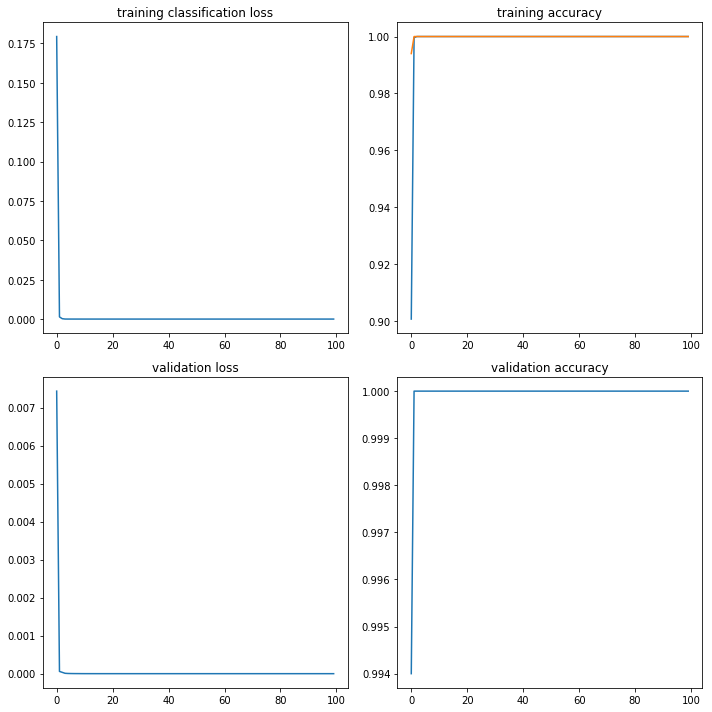

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('training classification loss')
plt.plot(atrain_losses)
plt.subplot(222)
plt.title('training accuracy')
plt.plot(atrain_accs)
plt.plot(aval_accs)
plt.subplot(223)
plt.title('validation loss')
plt.plot(aval_losses)
plt.subplot(224)
plt.title('validation accuracy')
plt.plot(aval_accs)
plt.tight_layout()

In [24]:
with open('plot_data/eo/onlyadv.pkl', 'wb') as f:
    pickle.dump([atrain_losses, atrain_accs, aval_losses, aval_accs], f)

## Train adversary on original encoder

In [25]:
fixenc_adversary = ClassNet()
fixenc_adv_criterion = nn.BCELoss()
fixenc_opt_adv = optim.Adam(fixenc_adversary.parameters(), lr=0.001, betas=(0.9, 0.999))

In [26]:
num_epochs = 100
fatrain_losses = []
fatrain_accs = []
faval_losses = []
faval_accs = []
epoch_time = AverageMeter()
ep_end = time.time()
for epoch in range(0, num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs))
#         scheduler_cls.step()
#         scheduler_enc.step()
        # train
        
        train_loss, train_acc = train_classifier_epoch(encoder, fixenc_adversary, 
                                                       imgs_train, colors_train, 
                                                       fixenc_opt_adv, fixenc_adv_criterion, 
                                                       device)
        fatrain_losses.append(train_loss)
        fatrain_accs.append(train_acc)
        # validate
        print('-'*10)
        val_loss, val_acc = validate_encoder_classifier_epoch(encoder, fixenc_adversary,
                                imgs_val, colors_val, fixenc_adv_criterion, device)

        print('Avg validation loss: {} \t Accuracy: {}'.format(val_loss, val_acc))
        faval_losses.append(val_loss)
        faval_accs.append(val_acc)
        
        print('-' * 20)
        epoch_time.update(time.time() - ep_end)
        ep_end = time.time()
        print('Epoch {}/{}\t'
              'Time {epoch_time.val:.3f} sec ({epoch_time.avg:.3f} sec)'.format(epoch, num_epochs, epoch_time=epoch_time))
        print('-'*20)

Epoch: 0/100
Batch: [0/78]	Time 0.007 (0.007)	Loss 0.7282 (0.7282)	Accuracy 0.5469 (0.5469)
Batch: [20/78]	Time 0.006 (0.006)	Loss 0.6279 (0.6577)	Accuracy 0.5938 (0.5543)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Batch: [40/78]	Time 0.006 (0.006)	Loss 0.6632 (0.6414)	Accuracy 0.5312 (0.5911)
Batch: [60/78]	Time 0.006 (0.006)	Loss 0.6359 (0.6310)	Accuracy 0.5625 (0.6073)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.6106 (0.6106)	Accuracy 0.6250 (0.6250)
Avg validation loss: 0.5898270282745361 	 Accuracy: 0.648
--------------------
Epoch 0/100	Time 0.511 sec (0.511 sec)
--------------------
Epoch: 1/100
Batch: [0/78]	Time 0.006 (0.006)	Loss 0.6147 (0.6147)	Accuracy 0.6406 (0.6406)
Batch: [20/78]	Time 0.005 (0.006)	Loss 0.5980 (0.5945)	Accuracy 0.7031 (0.6555)
Batch: [40/78]	Time 0.005 (0.006)	Loss 0.6445 (0.5945)	Accuracy 0.5625 (0.6608)
Batch: [60/78]	Time 0.009 (0.006)	Loss 0.6058 (0.5909)	Accuracy 0.6250 (0.6683)
----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.5944 (0.5944)	Accuracy 0.6875 (0.6875)
Avg validation loss: 0.575783655166626 	 Accuracy: 0.68
--------------------
Epoch 1/100	Time 0.505 sec (0.508 sec)
--------------------
Epoch: 2/100
Batch: [0/78]	Time 0.005 (0.005)	Loss 0.6029 (0.6029)	Accuracy 0.6719 (0.6719)
Batch: [20/78]	Time 0.005 (0.005)	Loss 0.5825 (0.5813)	Accuracy 0.7188 (0.6689)
Batch: [40/78]	Time 0.005 (0.006)	Loss 0.632

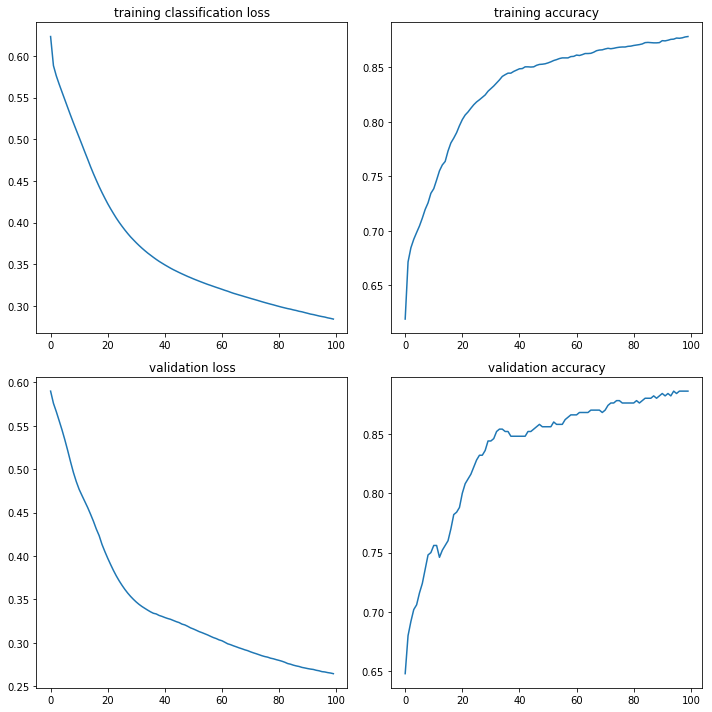

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('training classification loss')
plt.plot(fatrain_losses)
plt.subplot(222)
plt.title('training accuracy')
plt.plot(fatrain_accs)
plt.subplot(223)
plt.title('validation loss')
plt.plot(faval_losses)
plt.subplot(224)
plt.title('validation accuracy')
plt.plot(faval_accs)
plt.tight_layout()

In [28]:
with open('plot_data/eo/fixenc_adv.pkl', 'wb') as f:
    pickle.dump([fatrain_losses, fatrain_accs, faval_losses, faval_accs], f)

## LAFTR Training

In [68]:
laftr_encoder = LeNet()
laftr_adversary = ClassNet()
laftr_classifier = ClassNet()

In [69]:
laftr_adv_criterion = AdvEqOddsLoss(p=2)
laftr_cls_criterion = nn.BCELoss()

In [70]:
laftr_opt_adv = optim.Adam(laftr_adversary.parameters(), lr=0.001, betas=(0.9, 0.999))
laftr_opt_cls = optim.Adam(laftr_classifier.parameters(), lr=0.001, betas=(0.9, 0.999))
laftr_opt_enc = optim.Adam(laftr_encoder.parameters(), lr=0.001, betas=(0.9, 0.999))

In [71]:
num_epochs = 100

clsTrain_losses = []
clsTrain_accs = []
clsTrainCombined_losses = []
advTrain_losses = []
advTrain_accs = []
advTrainCombined_losses = []

combinedVal_losses = []
clsVal_losses = []
clsVal_accs = []
advVal_losses = []
advVal_accs = []

epoch_time = AverageMeter()

In [72]:
ep_end = time.time()
for epoch in range(0, num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs))
        
        cls_loss, cls_en_combinedLoss, cls_en_acc, adv_loss, adv_combinedLoss, adv_acc = laftr_epoch(
                                                        laftr_encoder, laftr_classifier, laftr_adversary, imgs_train,
                                                        shapes_train, colors_train, laftr_opt_enc, laftr_opt_cls, laftr_opt_adv, 
                                                        laftr_cls_criterion, laftr_adv_criterion, device)
        
        clsTrain_losses.append(cls_loss)
        clsTrain_accs.append(cls_en_acc)
        clsTrainCombined_losses.append(cls_en_combinedLoss)
        advTrain_losses.append(adv_loss)
        advTrain_accs.append(adv_acc)
        advTrainCombined_losses.append(adv_combinedLoss)
        
        print('Classifier accuracy: {}\t Adversary Accuracy: {}'.format(cls_en_acc, adv_acc))
        # validate
        print('-'*10)
        
        combinedVal_loss, clsVal_loss, clsVal_acc, advVal_loss, advVal_acc = laftr_validate(
                                                        laftr_encoder, laftr_classifier, laftr_adversary, imgs_val,
                                                        shapes_val, colors_val,laftr_cls_criterion, laftr_adv_criterion, device)
        
        combinedVal_losses.append(combinedVal_loss)
        clsVal_losses.append(clsVal_loss)
        clsVal_accs.append(clsVal_acc)
        advVal_losses.append(advVal_loss)
        advVal_accs.append(advVal_acc)
        
        print('Classifier validation acc: {:.4f} \t Adv validation acc: {:.4f}'.format(clsVal_acc, advVal_acc))
        
        print('-' * 20)
        epoch_time.update(time.time() - ep_end)
        ep_end = time.time()
        print('Epoch {}/{}\t'
              'Time {epoch_time.val:.3f} sec ({epoch_time.avg:.3f} sec)'.format(epoch, num_epochs, epoch_time=epoch_time))
        print('-'*20)

Epoch: 0/100
Batch: [0/78]	Time 0.031 (0.031)
Classifier loss 0.6989 (0.6989)	Adversary loss 0.9841 (0.9841)
Combined Loss during classifier step 1.6964 (1.6964)	Combined Loss during adversary step -1.7203 (-1.7203)
Classifier Accuracy 0.4375 (0.4375)	Adversary Accuracy 0.5156 (0.5156)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Batch: [20/78]	Time 0.026 (0.027)
Classifier loss 0.7312 (0.6978)	Adversary loss 1.0011 (0.9979)
Combined Loss during classifier step 1.7335 (1.6975)	Combined Loss during adversary step -1.7104 (-1.6914)
Classifier Accuracy 0.4219 (0.5089)	Adversary Accuracy 0.5000 (0.5231)
Batch: [40/78]	Time 0.026 (0.027)
Classifier loss 0.6941 (0.6959)	Adversary loss 1.0092 (0.9997)
Combined Loss during classifier step 1.7039 (1.6970)	Combined Loss during adversary step -1.7029 (-1.6928)
Classifier Accuracy 0.5000 (0.5118)	Adversary Accuracy 0.6094 (0.5156)
Batch: [60/78]	Time 0.026 (0.027)
Classifier loss 0.6747 (0.6934)	Adversary loss 1.0095 (1.0042)
Combined Loss during classifier step 1.6866 (1.6990)	Combined Loss during adversary step -1.6780 (-1.6948)
Classifier Accuracy 0.7656 (0.5174)	Adversary Accuracy 0.6562 (0.5592)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Classifier accuracy: 0.5662	 Adversary Accuracy: 0.565
----------
Test batch: [0/7]	Time 0.007 (0.007)
Classifier loss 0.2667 (0.2667)	Adversary loss 0.9901 (0.9901)
Combined Loss 1.2568 (1.2568)	Classifier Accuracy 1.0000 (1.0000)	Adversary Accuracy 0.5312 (0.5312)
Classifier validation acc: 0.9680 	 Adv validation acc: 0.5400
--------------------
Epoch 0/100	Time 2.161 sec (2.161 sec)
--------------------
Epoch: 1/100
Batch: [0/78]	Time 0.026 (0.026)
Classifier loss 0.3198 (0.3198)	Adversary loss 0.9325 (0.9325)
Combined Loss during classifier step 1.2977 (1.2977)	Combined Loss during adversary step -1.2262 (-1.2262)
Classifier Accuracy 0.9375 (0.9375)	Adversary Accuracy 0.4688 (0.4688)
Batch: [20/78]	Time 0.026 (0.026)
Classifier loss 0.2833 (0.7915)	Adversary loss 0.9999 (0.8861)
Combined Loss during classifier step 1.2779 (1.6880)	Combined Loss during adversary step -1.2647 (-1.6987)
Classifier Accuracy 0.9844 (0.8452)	Adversary Accuracy 0.4844 (0.4754)
Batch: [40/78]	Time 0.026 (

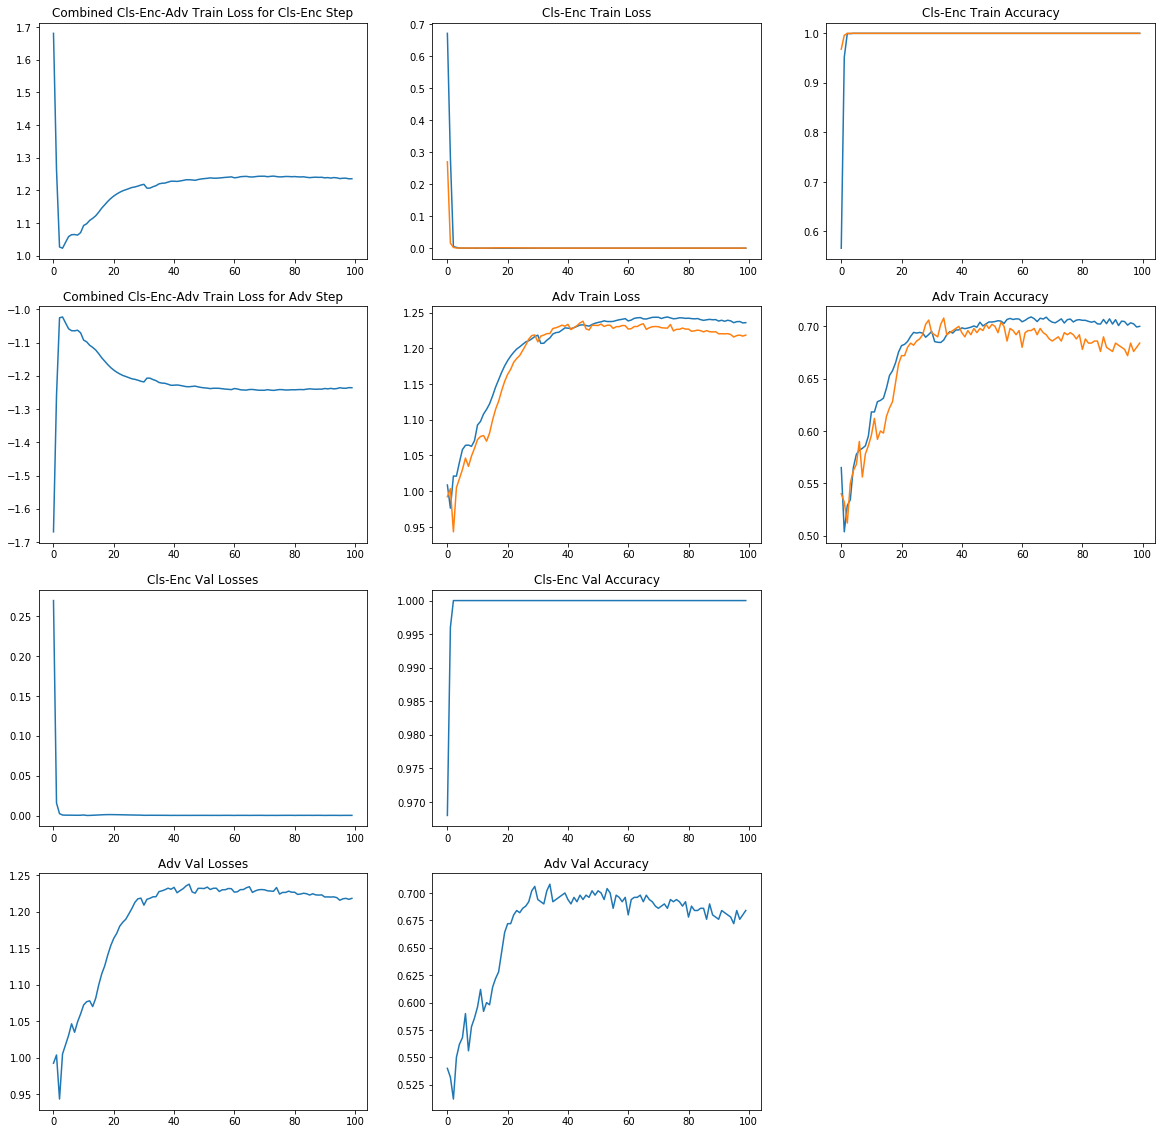

In [73]:
plt.figure(figsize=(20,20))
plt.subplot(431)
plt.title('Combined Cls-Enc-Adv Train Loss for Cls-Enc Step')
plt.plot(clsTrainCombined_losses)

plt.subplot(432)
plt.title('Cls-Enc Train Loss')
plt.plot(clsTrain_losses)
plt.plot(clsVal_losses)

plt.subplot(433)
plt.title('Cls-Enc Train Accuracy')
plt.plot(clsTrain_accs)
plt.plot(clsVal_accs)
plt.subplot(434)
plt.title('Combined Cls-Enc-Adv Train Loss for Adv Step')
plt.plot(advTrainCombined_losses)
plt.subplot(435)
plt.title('Adv Train Loss')
plt.plot(advTrain_losses)
plt.plot(advVal_losses)

plt.subplot(436)
plt.title('Adv Train Accuracy')
plt.plot(advTrain_accs)
plt.plot(advVal_accs)

plt.subplot(437)
plt.title('Cls-Enc Val Losses')
plt.plot(clsVal_losses)
plt.subplot(438)
plt.title('Cls-Enc Val Accuracy')
plt.plot(clsVal_accs)
plt.subplot(4,3,10)
plt.title('Adv Val Losses')
plt.plot(advVal_losses)
plt.subplot(4,3,11)
plt.title('Adv Val Accuracy')
plt.plot(advVal_accs)

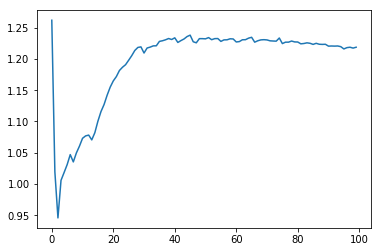

In [74]:
plt.plot(combinedVal_losses)

In [75]:
with open('plot_data/eo/laftr_p2_100.pkl', 'wb') as f:
    pickle.dump([clsTrain_accs, clsTrainCombined_losses, 
                 clsTrain_losses, advTrain_losses, 
                 advTrain_accs, advTrainCombined_losses,
                 combinedVal_losses, clsVal_losses,
                 clsVal_accs, advVal_losses, advVal_accs], f)